# Installing OpenCV

## Check for the prerequisites
Before you start, make sure the initial prerequisites are satisfied. Do the following check at the VSCode terminal (go to __Terminal__ tab then click on __new terminal__ or use the shortcut __CTRL + Shift + '__). 

1. Check for python : `python3 --version`
2. Activate the environment : `source venv/bin/activate`
3. pip is up-to-date : `python3 -m pip install --upgrade pip`

## Installing packages

* The `opencv-python` is the original python version for OpenCV which was originally developed using C++. 
* The `opencv-contrib-python` inherits the OpenCV base package, also it includes several contribution modules which are contributed by the OpenSource community.
* OpenCV also installs `numpy` module for scientific computation as beneath the OpenCV main module all the numerical and linear algebraic operations are performed by numpy. 
* The `caer` package is an additional package that wraps several OpenCV functions for ease of use. 

`python3 -m pip install opencv-contrib-python caer`

# Task 1: Reading Images and Videos

First import the openCV module as cv

In [2]:
import cv2 as cv

## 1.1. Reading an Image

Run the following code, it must show up the __sample1.jpg__ image located at the __images__ folder. 

In [3]:
image_loc = 'images/sample1.jpg'  # defines the image location 
try:  # the exception handling prevents any accidental crash 
    img = cv.imread(image_loc)  # reads the image as a matrix 
    cv.imshow(winname='image', mat=img) # shows the image in a window 
    cv.waitKey(0)    # holds the image in the window until closed explicitly
except:
    print('Error')

__Output__ <br>
![](figs/fig1.png)

Change the image name to __sample2.jpg__ to see the change. You could also download another image from the Internet and place it into the same folder and try to show it. 

## 1.2. Reading videos
### 1.2.1. Reading video from a file

* A video is a sequence of images 
* to read a video, first create a __VideoCapture__ object
* Read the object frame by frame using a while loop. A capture pointer starts from the first frame and iterate across the stream. 
* When done, release the capture pointer. 
* Destroy the window buffer.  

Notice the code is encapsulated within a `try - except` block to avoid any unanticipated exception such as wrong file name, corrupted file etc. 

In [3]:
video_location = 'videos/sample_vid1.mp4'   # specify the video location
try:
    capture = cv.VideoCapture(video_location)   # reads the video into a capture object 

    while True:
        isTrue, frame = capture.read()  # reads the video frame by frame, isTrue is boolean that stores the read status(boolean)
        cv.imshow(winname='Sample Video', mat=frame) # show images frame by frame 
        if cv.waitKey(20) & 0xFF == ord('d'):        # stop the video is the key 'd' is pressed (you can change as per your choice)
            break
    capture.release()      # release the capture pointer
    cv.destroyAllWindows() # clear all memory resources  
except:
    print('Error !!')

__Output__ <br>
![](figs/fig2.png)

Change the video file to __sample_vid2.mp4__ 

### 1.2.2. Reading a video from a live source 
Reading video from a live feed needs a simple adjustment. __Use the video location to 0__ the number represents the video input.
* 0 is the default webcam 
* 1 if you have any additional camera and so on.

In [10]:
video_location = 0   # specify the video location  as webcam
try:
    capture = cv.VideoCapture(video_location)   # reads the video into a capture object 

    while True:
        isTrue, frame = capture.read()  # reads the video frame by frame, isTrue is boolean that stores the read status(boolean)
        cv.imshow(winname='Sample Video', mat=frame) # show images frame by frame 
        if cv.waitKey(20) & 0xFF == ord('d'):        # stop the video is the key 'd' is pressed (you can change as per your choice)
            break
    capture.release()      # release the capture pointer
    cv.destroyAllWindows() # clear all memory resources  
except:
    print('Error !!')

__Output__ <br>

![](figs/fig3.png)

# Task 2: Scaling and Resizing 

* Large video files consume significant GPU resource to process
* __Downscaling__ : Sometimes, a video frame is larger than the display screen size (watching 4K video in a 1080p screen). In such as case to reduce the unnecessary computation, it's a good idea to scale a video down to manageable size. 
* __Upscaling__ : On the contrary to _Downscaling_, the _Upscaling_ process increases each frame of a video and displays it (HD Ready feature, that takes a 1080p screen and displays a 4K version of it)
* Its a best-practice to downscale a video for processing. 

## Task 2.1. Custom Scaling 

__Step1 :__ We first start with creating a custom function called `scale_frame(frame, scale, side_by_side)` that takes a frame to be scaled and a scale factor (float) and returns a scaled frame by __Interpolation__. The __side_by_side__ parameter is unset by default, if it's set, the scaled and the original video will play side by side.   

In [11]:
def scale_frame(frame, scale):
    # read the actual height and weight, scale it and store
    height = int(frame.shape[0]*scale)
    width = int(frame.shape[1]*scale)
    
    #return the scaled frame
    return cv.resize(frame, (width, height), interpolation=cv.INTER_AREA) # performs rescaling by interpolation

__Step 2:__ Create a read_video function that takes a video source(either a video file or a camera index), a scale factor as input and displays a scaled video.

In [12]:
def read_video(source, scale, side_by_side=False):
    try:
        capture = cv.VideoCapture(source)
        while True:
            isTrue, frame = capture.read()
            scaled_frame = scale_frame(frame, scale)  # calls the scale_frame function to scale each frame 
            
            cv.imshow('scaled video', scaled_frame)
            if side_by_side:
                cv.imshow('original video', frame)
            
            if cv.waitKey(20) & 0XFF == ord('d'):
                break
        capture.release()
    except:
        print('error')
    finally:
        cv.destroyAllWindows()

__Step 3:__ Verify

In [13]:
read_video(source=0, scale=2, side_by_side=True) # calling read_video with live feed, scaling 2X and playing with original by side.

__Output__ <br>

![](figs/fig4.png)

## 2.2. Playing with various capture attributes

Basic Capture parameters:

| id |  Parameter | meaning |
|---|---|---|
| 3 | CAP_PROP_FRAME_WIDTH | width |
| 4 | CAP_PROP_FRAME_HEIGHT | Height |
| 5 | CAP_PROP_FPS | FPS |
| 6 | CAP_PROP_POS_MSEC | Current position of the capture pointer |
| 7 | CAP_PROP_FRAME_COUNT | total number of frames in the video file|
| 8 | CAP_PROP_BRIGHTNESS | It only works with a camera or webcam. Used to find out the brightness | 
| 9 | CAP_PROP_CONTRAST | This property also works with the camera or webcam only. Used to find out the contrast on images captured |
| 10 | CAP_PROP_SATURATION | This is used to get the saturation of live frames capturing via cameras. This also doesn’t work on the video file.|
|11 | CAP_PROP_HUE | This is for knowing the HUE value of the image. Only for cameras.|
|12 | CAP_PROP_GAIN | This property is used to get the gain of the image. Wouldn’t work with the video file, simply return “0” if applied on a video file|
|13| CAP_PROP_CONVERT_RGB | This property returns a Boolean value which indicates whether the images should be converted to RGB colorspace or not | 






### 2.2.1 Getting the params

The following code will read the basic OpenCV parameter from a live video and shows it while streaming from the source. 

In [43]:
from IPython.display import clear_output

def show_details(capture):   # prints the basic attributes 
    clear_output(wait=True)  # clear the notebook cell after printing 
    print(f"CAP_PROP_FRAME_WIDTH \t: {capture.get(cv.CAP_PROP_FRAME_WIDTH)}")
    print(f"CAP_PROP_FRAME_HEIGHT \t: {capture.get(cv.CAP_PROP_FRAME_HEIGHT)}")
    print(f"CAP_PROP_FPS        \t: {capture.get(cv.CAP_PROP_FPS)}")
    print(f"CAP_PROP_POS_MSEC   \t: {capture.get(cv.CAP_PROP_POS_MSEC)}")
    print(f"CAP_PROP_FRAME_COUNT \t: {capture.get(cv.CAP_PROP_FRAME_COUNT)}")
    print(f"CAP_PROP_BRIGHTNESS \t: {capture.get(cv.CAP_PROP_BRIGHTNESS)}")
    print(f"CAP_PROP_CONTRAST   \t: {capture.get(cv.CAP_PROP_CONTRAST)}")
    print(f"CAP_PROP_SATURATION \t: {capture.get(cv.CAP_PROP_SATURATION)}")
    print(f"CAP_PROP_HUE        \t: {capture.get(cv.CAP_PROP_HUE)}")
    print(f"CAP_PROP_GAIN       \t: {capture.get(cv.CAP_PROP_GAIN)}")
    print(f"CAP_PROP_CONVERT_RGB \t: {capture.get(cv.CAP_PROP_CONVERT_RGB)}")

def show_video(source): 
    capture = cv.VideoCapture(source)
    while True:
        isTrue, frame = capture.read()
        show_details(capture)   # calling the capture details 
        cv.imshow('Window', frame)
        if cv.waitKey(20) & 0xFF == ord('d'): # press 'd' to exit
            break
    capture.release()
    cv.destroyAllWindows()

In [41]:
show_video(source=0) # calling the live capture

CAP_PROP_FRAME_WIDTH 	: 640.0
CAP_PROP_FRAME_HEIGHT 	: 480.0
CAP_PROP_FPS        	: 30.0
CAP_PROP_POS_MSEC   	: 736991915.211
CAP_PROP_FRAME_COUNT 	: -1.0
CAP_PROP_BRIGHTNESS 	: 0.0
CAP_PROP_CONTRAST   	: 0.0
CAP_PROP_SATURATION 	: 64.0
CAP_PROP_HUE        	: 0.0
CAP_PROP_GAIN       	: 1.0
CAP_PROP_CONVERT_RGB 	: 1.0


### 2.2.2. Setting the params 

In [14]:
## set params
alter_param = {
    'width' : 640, 
    'height': 480, 
    'fps' : 30, 
    'brightness' : 50,
    'contrast' : 10,
    'saturation' : 100,
    'hue': 0,
    'gain' : 1,
    'rgb' : 1 
}

In [17]:
# sourcecode
from IPython.display import clear_output

def show_details(capture):   # prints the basic attributes 
    clear_output(wait=True)  # clear the notebook cell after printing 
    print(f"CAP_PROP_FRAME_WIDTH \t: {capture.get(cv.CAP_PROP_FRAME_WIDTH)}")
    print(f"CAP_PROP_FRAME_HEIGHT \t: {capture.get(cv.CAP_PROP_FRAME_HEIGHT)}")
    print(f"CAP_PROP_FPS        \t: {capture.get(cv.CAP_PROP_FPS)}")
    print(f"CAP_PROP_POS_MSEC   \t: {capture.get(cv.CAP_PROP_POS_MSEC)}")
    print(f"CAP_PROP_FRAME_COUNT \t: {capture.get(cv.CAP_PROP_FRAME_COUNT)}")
    print(f"CAP_PROP_BRIGHTNESS \t: {capture.get(cv.CAP_PROP_BRIGHTNESS)}")
    print(f"CAP_PROP_CONTRAST   \t: {capture.get(cv.CAP_PROP_CONTRAST)}")
    print(f"CAP_PROP_SATURATION \t: {capture.get(cv.CAP_PROP_SATURATION)}")
    print(f"CAP_PROP_HUE        \t: {capture.get(cv.CAP_PROP_HUE)}")
    print(f"CAP_PROP_GAIN       \t: {capture.get(cv.CAP_PROP_GAIN)}")
    print(f"CAP_PROP_CONVERT_RGB \t: {capture.get(cv.CAP_PROP_CONVERT_RGB)}")

def alter_params(capture, alter_param):   # alters the parameters 
    capture.set(cv.CAP_PROP_FRAME_WIDTH, alter_param['width'])
    capture.set(cv.CAP_PROP_FRAME_HEIGHT, alter_param['height'])
    capture.set(cv.CAP_PROP_FPS, alter_param['fps'])
    capture.set(cv.CAP_PROP_BRIGHTNESS, alter_param['brightness'])
    capture.set(cv.CAP_PROP_CONTRAST, alter_param['contrast'])
    capture.set(cv.CAP_PROP_SATURATION, alter_param['saturation'])
    capture.set(cv.CAP_PROP_HUE, alter_param['hue'])
    capture.set(cv.CAP_PROP_GAIN, alter_param['gain'])
    capture.set(cv.CAP_PROP_CONVERT_RGB, alter_param['rgb'])
    return capture

def show_video(source):    # renders the video stream 
    print('Preparing capture... ')
    try:
        capture = cv.VideoCapture(source)
        capture = alter_params(capture, alter_param) # calling to alter the params
        print('Displaying... ')
        while True:
            isTrue, frame = capture.read()
            show_details(capture)   # calling the capture details 
            cv.imshow('Window', frame)
            if cv.waitKey(20) & 0xFF == ord('d'): # press 'd' to exit
                break
        capture.release()
    except:
        print('Error')
    finally:
        cv.destroyAllWindows()

In [18]:
show_video(source=0)

CAP_PROP_FRAME_WIDTH 	: 640.0
CAP_PROP_FRAME_HEIGHT 	: 480.0
CAP_PROP_FPS        	: 30.0
CAP_PROP_POS_MSEC   	: 744583848.9555
CAP_PROP_FRAME_COUNT 	: -1.0
CAP_PROP_BRIGHTNESS 	: 0.0
CAP_PROP_CONTRAST   	: 0.0
CAP_PROP_SATURATION 	: 64.0
CAP_PROP_HUE        	: 0.0
CAP_PROP_GAIN       	: 1.0
CAP_PROP_CONVERT_RGB 	: 1.0


__output__ <br>

![](figs/fig5.png)

# Task 3: Drawing shapes 

In the first practice, we're going to see how to create a blank (dummy) image using __numpy__ and then draw basic shapes on top of it. Then we'll do the same on a real image and finally on a video.  

## 3.1. Drawing on a blank image 

### Step 1: Creating a black image 

As digital images are read as a $m\times n$ matrix, we do a reverse engineering here. We'll first create a blank matrix and present it as an image.

In [20]:
import numpy as np   # library to to matrix operations
import cv2 as cv

image_size = (640,480)  # define the image size

blank_matrix = np.zeros(image_size, dtype='uint8') # create a 8-bit unsigned integer matrix 
try:
    cv.imshow(winname='blank_image', mat=blank_matrix)
    cv.waitKey(0)
except:
    print('Error')

__Output__

![](figs/fig6.png)

To create a color image, we need a 3D matrix. the first two dimension are the height and width and the third one is the color depth.  

In [21]:
image_size = (640,480,3)  # define the image size with color depth of 3 channel

blank_matrix = np.zeros(image_size, dtype='uint8') # create a 8-bit unsigned integer matrix 
blank_matrix[:] = 0,255,0   # the values are in R,G,B format (change it to get more colors)
try:
    cv.imshow(winname='blank_image', mat=blank_matrix)
    cv.waitKey(0)
except:
    print('Error')

__Output__

![](figs/fig7.png)

You can also color the image partially, by selecting specific row and column range 

In [22]:
image_size = (640,480,3)  # define the image size with color depth of 3 channel

height, width, depth = image_size

blank_matrix = np.zeros(image_size, dtype='uint8') # create a 8-bit unsigned integer matrix 

# coloring image segments
blank_matrix[0 : height//2 , 0 : width//2] = 255,0,0   # top left quarter 
blank_matrix[0 : height//2 , width//2 : width] = 0,255,0   # top right quarter 
blank_matrix[height//2 : height , 0 : width//2] = 0,0,255   # bottom left quarter
blank_matrix[height//2 : height , width//2 : width] = 255,0,255   # bottom left quarter  

try:
    cv.imshow(winname='blank_image', mat=blank_matrix)
    cv.waitKey(0)
except:
    print('Error')

__Output__

![](figs/fig8.png)

### Step 2: Creating basic shapes

In [46]:
image_size = (600,800,3)  # define the image size

blank_matrix = np.zeros(image_size, dtype='uint8') # create a 8-bit unsigned integer matrix 

# adding text 
cv.putText(img=blank_matrix, 
           org=(300, 50),         # origin point 
           text='Test Shapes',    # text to print 
           color=(255,255,0),     # Text color
           fontFace=cv.FONT_HERSHEY_PLAIN, # font to use
           fontScale=2)           # font size      

#drawing a rectangle
cv.rectangle(img=blank_matrix,     # where to draw?
            pt1=(100,100),         # top-left 
            pt2=(300,300),         # bottom-right
            color=(255,0,0),       # stroke-color
            thickness=2)           # stroke-width

#drawing a rectangle with filled color
cv.rectangle(img=blank_matrix,     
            pt1=(200,200),         
            pt2=(400,400),       
            color=(255,0,0),       
            thickness=-1)   # stroke-width (use cv.FILLED or -1 to fill)

#drawing a circle
cv.circle(img=blank_matrix, 
          center=(400,400),        # cordinate of the center 
          radius=200,              # radius 
          color=(0,255,0),         
          thickness=2)

#drawing a line 
cv.line(img=blank_matrix,
        pt1=(100,100),       # start coordinate 
        pt2=(400,400),       # end coordinate  
        color=(0,0,255), 
        thickness=2)

try:
    cv.imshow(winname='blank_image', mat=blank_matrix)
    cv.waitKey(0)
except:
    print('Error')

![](figs/shapes_1.png)

## Task 
Write a function to draw the figure below <br>
![](figs/shapes.png) 

# Task 4: Basic Image processing

## 4.1. Converting into Greyscale 

In [1]:
import cv2 as cv

In [4]:
image_path = 'images/sample1.jpg'

try:
    image = cv.imread(image_path)   # loads the image 
    image_grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY) #converting into grey 

    cv.imshow(winname='Original image', mat=image)  # shows original
    cv.imshow(winname='Greyscale image', mat=image_grey) # shows greyscale 
    cv.waitKey(0)
except:
    print('Error')

![](figs/fig9.png)

## 4.2. Blurring 

The blurring effect is done by convolving a $2\times 2$ window called _Kernel_ over sliding over the image and replacing the member pixels using the average value. The kernel size should be an odd number. Higher the number, higher the blur. 

In [17]:
image_path = 'images/sample1.jpg'
try:
    image = cv.imread(image_path)   # loads the image 

    kernel_size=(5,5)  # 2x2 kernel size, use an odd number
    image_blured = cv.GaussianBlur(src=image, ksize=kernel_size, sigmaX=cv.BORDER_DEFAULT) #converting into grey 

    cv.imshow(winname='Original image', mat=image)  # shows original
    cv.imshow(winname='Blurred image', mat=image_blured) # shows greyscale 
    cv.waitKey(0)
except:
    print('Error')


![](figs/fig10.png)

Try increasing the kernel size, and see the effect... 

# 4.3. Edge Detection 
For complex images, it's recommended to blur the image first to detect fewer edges. 

In [3]:
image_path = 'images/sample1.jpg'
try:
    image = cv.imread(image_path)   # loads the image 

    # alther the thresholds to control edges 
    low_lim = 125
    up_lim = 175
    image_edges = cv.Canny(image=image, threshold1=low_lim, threshold2=up_lim) # edge detection 

    cv.imshow(winname='Original image', mat=image)  # shows original
    cv.imshow(winname='Image Edges', mat=image_edges) # shows greyscale 
    cv.waitKey(0)
except:
    print('Error')

![](figs/fig11.png)

## 4.4. Scaling 

For scaling or resizing and image, the image needs to be interpolated to recalculate the pixel values.
* While down-scaling, the image use `cv.INTER_AREA` method (which is the default one).
* While up-scaling, use either `cv.INTER_LINEAR` or `cv.INTER_CUBIC` (cubic is more computationally intensive but better)

In [22]:
image_path = 'images/sample1.jpg'
try:
    image = cv.imread(image_path)   # loads the image 

    # alther the thresholds to control edges
    original_res = image.shape 
    scale = 2
    target_res = (scale*original_res[1], scale*original_res[0]) # calculated target resolution by scaling 
    image_scaled = cv.resize(image, target_res, interpolation=cv.INTER_AREA) # scaling 

    cv.imshow(winname=f'Original image ({original_res[0]}X{original_res[1]})', mat=image)  # shows original
    cv.imshow(winname=f'Scaled image ({target_res})', mat=image_scaled) # shows scaled  
    cv.waitKey(0)
except:
    print('Error')

![](figs/fig12.png)

# Task 5 : Color Spaces

OpenCV reads an color image in the BGR format by default. Whereas, the computer screen renders an image in RGB. In this example we're going to use _matplotlib_ to show images instead of the windows converting the images into different color schemes. 
1. RGB
2. HSV
3. LAB 

In [50]:
image_path = 'images/sample1.jpg'

try:
    image_bgr = cv.imread(image_path)    # default BGR 

    image_bgr = cv.resize(image_bgr, (1920//2, 1080//2),cv.INTER_AREA) ## resing to fit 4 pics in screen 

    image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB) # BGR --> RGB
    image_hsv = cv.cvtColor(image_bgr, cv.COLOR_BGR2HSV) # BGR --> HSV  
    image_lab = cv.cvtColor(image_bgr, cv.COLOR_BGR2LAB) # BGR --> HSV  

    cv.imshow('original', image_bgr)
    cv.imshow('HSV', image_hsv)
    cv.imshow('RGB', image_rgb)
    cv.imshow('LAB', image_lab) 

    cv.waitKey(0)
except:
    print('Error')

![](figs/fig13.png)

# Task 6 : Color Channels 

When splitting an color image the dimension of the resulting images per channel changes as the 3rd dimension gets lost. Therefore, when showing them as it is, it appears to be a Greyscale image with the channeled colored washed out. To add the third dimension the process is given below....
1. create a blank image with same resolution 
2. Merge individual channel with other two channels as blank
    1. Blue  = (blue_channel , blank , blank )
    2. Green = (blank, green_channel , blank  )
    3. Red = ( blank , blank , red_channel )

In [60]:
import numpy as np
image_path = 'images/sample1.jpg'

try:
    image = cv.imread(image_path)    # default BGR 

    image = cv.resize(image, (1920//2, 1080//2), interpolation=cv.INTER_AREA)
    image_b,image_g,image_r = cv.split(image)  # channel split

    # merging 
    blank_image = np.zeros(image.shape[:2], dtype='uint8')
    image_b = cv.merge([image_b, blank_image, blank_image])
    image_g = cv.merge([blank_image, image_g, blank_image])
    image_r = cv.merge([blank_image, blank_image, image_r])


    cv.imshow('original', image)
    cv.imshow('Blue', image_b)
    cv.imshow('Green', image_g)
    cv.imshow('Red', image_r) 

    cv.waitKey(0)
except:
    print('Error...')


-1

![](figs/fig14.png)

# Task 7 : Histogram 

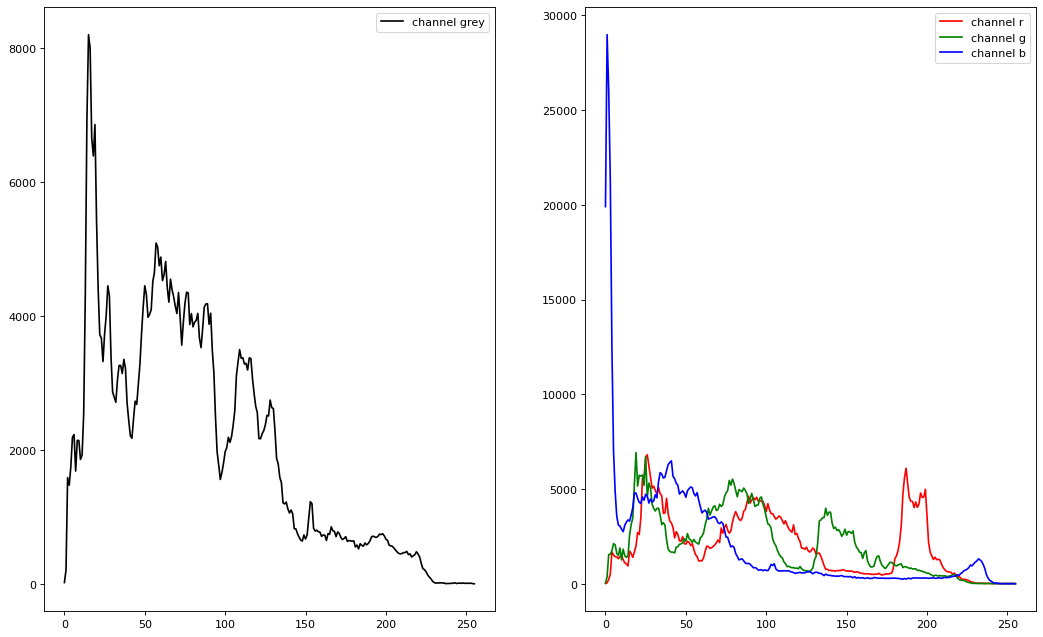

In [29]:
import matplotlib.pyplot as plt
import matplotlib
import cv2 as cv

plt.figure(figsize=(16, 10), dpi=80)

image_path = 'images/sample1.jpg'
ax_grey = plt.subplot(1,2,1)  # row 1, col 1
ax_rgb  = plt.subplot(1,2,2)  # row 1, col 2


image_bgr = cv.imread(image_path)    # default BGR 

image_bgr = cv.resize(image_bgr, (1920//2, 1080//2),cv.INTER_AREA) ## resing to fit 4 pics in screen 

image_grey = cv.cvtColor(image_bgr, cv.COLOR_BGR2GRAY)# BGP --> Grey 
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB) # BGR --> RGB

#gray scale histogram 
gray_hist = cv.calcHist(images=[image_grey], channels=[0], mask=None, histSize=[256], ranges=[0,256])

ax_grey.set_title='Gray Scale'


ax_grey.plot(gray_hist, color='black', label='channel grey')
ax_grey.legend()

# bgr histogram 
ax_grey.set_title='RGB Scale'


channels = ('r','g', 'b')
for i, color in enumerate(channels):
    bgr_hist = cv.calcHist(images=[image_bgr], channels=[i], mask=None, histSize=[256], ranges=[0,256])
    ax_rgb.plot(bgr_hist, color=color, label = f'channel {color}')
    ax_rgb.legend()

plt.show()

